In [1]:
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from scipy import ndimage


In [2]:
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)

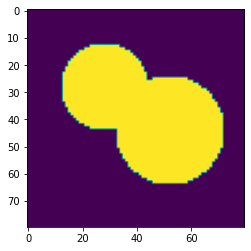

In [3]:
plt.imshow(image)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

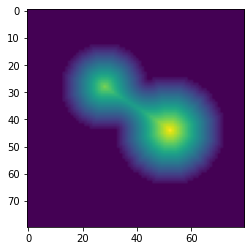

In [4]:
distance = ndimage.distance_transform_edt(image)
plt.imshow(distance)
distance

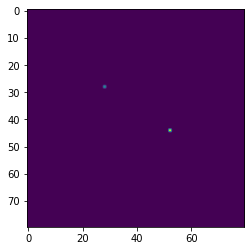

In [5]:
local_maxi = peak_local_max( distance, min_distance=3, labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
markers, _ = ndimage.label(mask)
plt.imshow(markers)

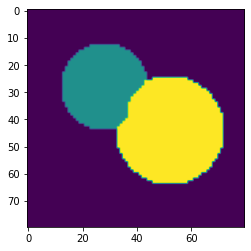

In [6]:
labels = watershed(-distance, markers, mask=image)
plt.imshow(labels)

In [7]:
import imageio
from scipy import misc
import cv2


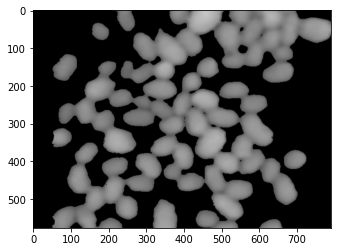

In [8]:
img = imageio.imread('3.png') 


plt.imshow(img)

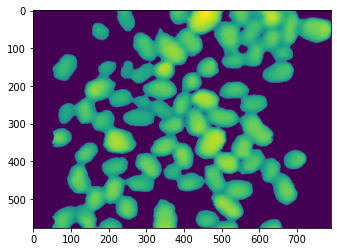

In [9]:
from skimage import color


gray =  np.mean(img, -1)

plt.imshow(gray)

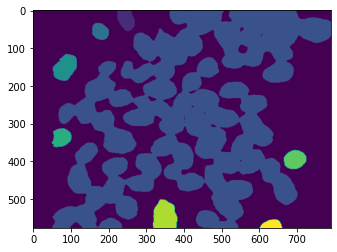

In [10]:
mask = gray > gray.mean()
label_im, nb_labels = ndimage.label(mask)
plt.imshow(label_im)

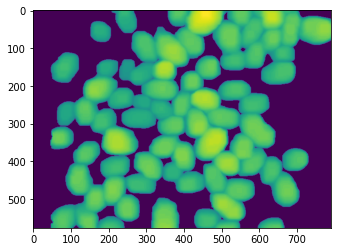

In [18]:
from scipy import ndimage as ndi
image_max = ndi.maximum_filter(gray, size=10, mode='constant')
plt.imshow(image_max)

In [29]:

from skimage import filters

from skimage.segmentation import random_walker

markers[~img] = -1

labels_rw = random_walker(img, markers)

ValueError: Incompatible data and labels shapes.

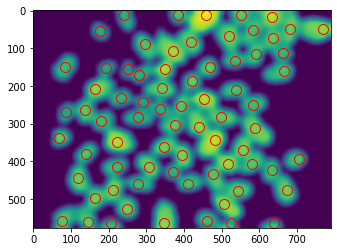

In [27]:
# gray3 = cv2.GaussianBlur(gray, (21,21),11)
gray3 = cv2.blur(gray ,(21,21))



local_maxi = peak_local_max(gray3, min_distance=11, labels=label_im)
mask = np.zeros(gray.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
markers, _ = ndimage.label(mask)
plt.imshow(gray3)
plt.plot(local_maxi[:,1], local_maxi[:,0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)


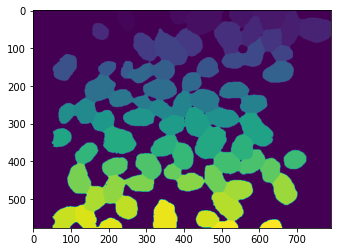

In [352]:
labels = watershed(-gray, markers, mask=label_im)
a = np.unique(labels)[0]
plt.imshow(labels)